In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Interpolation/QLYS/InterpolatedDenWeekQLYS.csv')

In [3]:
df

,DATES,D Revenue,U CR,D OE,U NOI,U CAPEX,U WK,D FCF
0,2017-01-01,4479.720772,1283.851030,2201.862589,165.498382,2075.336663,23013.204073,4489.072600
1,2017-01-08,4451.483282,1294.720243,2188.701161,166.321882,2083.350715,22872.363692,4514.461229
2,2017-01-15,4423.245793,1305.589456,2175.539732,167.145382,2091.364766,22731.523312,4539.849859
3,2017-01-22,4395.008303,1316.458670,2162.378304,167.968883,2099.378817,22590.682931,4565.238488
4,2017-01-29,4366.770814,1327.327883,2149.216875,168.792383,2107.392868,22449.842550,4590.627117
...,...,...,...,...,...,...,...,...
166,2020-03-08,5784.971103,882.718109,2632.808061,334.189988,2125.110319,12126.998352,5656.224349
167,2020-03-15,5813.800870,863.462381,2641.668669,335.172784,2125.572740,11921.914455,5685.640889
168,2020-03-22,5842.630638,844.206653,2650.529277,336.155581,2126.035162,11716.830559,5715.057429
169,2020-03-29,5871.460405,824.950925,2659.389885,337.138378,2126.497583,11511.746663,5744.473970


In [4]:
df["D FCF"].mean()

4156.8376594786005

In [5]:
dataset = df.values

In [6]:
dataset

array([['2017-01-01', 4479.7207719281, 1283.8510297798, ...,
        2075.33666345166, 23013.204073189903, 4489.07260016184],
       ['2017-01-08', 4451.483282441685, 1294.7202430567231, ...,
        2083.3507145508997, 22872.363692428706, 4514.461229361381],
       ['2017-01-15', 4423.24579295527, 1305.5894563336462, ...,
        2091.3647656501403, 22731.5233116675, 4539.849858560922],
       ...,
       ['2020-03-22', 5842.630637818996, 844.2066529984876, ...,
        2126.035161544405, 11716.830558986809, 5715.057429384644],
       ['2020-03-29', 5871.460405384058, 824.9509248537581, ...,
        2126.4975825990928, 11511.746662509153, 5744.473969587522],
       ['2020-04-05', 5900.29017294912, 805.6951967090289, ...,
        2126.9600036537804, 11306.662766031499, 5773.890509790401]],
      dtype=object)

In [7]:
X = dataset[:,1:7]
Y = dataset[:,7]

In [8]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)


In [9]:
X_scale

array([[0.20534555, 0.40299777, 0.30503239, 0.        , 0.        ,
        0.48249751],
       [0.18954974, 0.41215852, 0.29419379, 0.00477052, 0.00838259,
        0.47669263],
       [0.17375393, 0.42131928, 0.2833552 , 0.00954104, 0.01676519,
        0.47088774],
       ...,
       [0.96774575, 0.0324581 , 0.67451487, 0.98861336, 0.05302997,
        0.0169055 ],
       [0.98387287, 0.01622905, 0.68181169, 0.99430668, 0.05351366,
        0.00845275],
       [1.        , 0.        , 0.68910851, 1.        , 0.05399735,
        0.        ]])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(136, 6) (17, 6) (18, 6) (136,) (17,) (18,)


In [12]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [13]:
model = Sequential([
    Dense(6, activation='elu', input_shape=(6,)),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(64, activation='elu'),
    Dense(1, activation='elu'),
])

In [14]:
model.compile(optimizer='rmsprop',
              loss='mean_absolute_error')

In [15]:
hist = model.fit(X_train, Y_train,
          batch_size=2, epochs=1500,
          validation_data=(X_val, Y_val))

Train on 136 samples, validate on 17 samples
Epoch 1/1500
136/136 [==============================] - 0s 3ms/step - loss: 3386.4113 - val_loss: 764.0494
Epoch 2/1500
136/136 [==============================] - 0s 1ms/step - loss: 940.1392 - val_loss: 721.5158
Epoch 3/1500
136/136 [==============================] - 0s 1ms/step - loss: 928.8570 - val_loss: 656.9634
Epoch 4/1500
136/136 [==============================] - 0s 1ms/step - loss: 860.4105 - val_loss: 648.3533
Epoch 5/1500
136/136 [==============================] - 0s 1ms/step - loss: 795.6092 - val_loss: 608.3031
Epoch 6/1500
136/136 [==============================] - 0s 1ms/step - loss: 744.7668 - val_loss: 491.6479
Epoch 7/1500
136/136 [==============================] - 0s 1ms/step - loss: 678.9880 - val_loss: 465.8151
Epoch 8/1500
136/136 [==============================] - 0s 1ms/step - loss: 607.1269 - val_loss: 417.4922
Epoch 9/1500
136/136 [==============================] - 0s 1ms/step - loss: 497.9994 - val_loss: 347.0086


136/136 [==============================] - 0s 1ms/step - loss: 156.2510 - val_loss: 154.2024
Epoch 78/1500
136/136 [==============================] - 0s 1ms/step - loss: 158.1419 - val_loss: 179.4034
Epoch 79/1500
136/136 [==============================] - 0s 1ms/step - loss: 156.6314 - val_loss: 215.2939
Epoch 80/1500
136/136 [==============================] - 0s 1ms/step - loss: 149.9064 - val_loss: 105.0518
Epoch 81/1500
136/136 [==============================] - 0s 1ms/step - loss: 152.7459 - val_loss: 214.6659
Epoch 82/1500
136/136 [==============================] - 0s 1ms/step - loss: 152.0368 - val_loss: 188.6234
Epoch 83/1500
136/136 [==============================] - 0s 1ms/step - loss: 150.7512 - val_loss: 187.3685
Epoch 84/1500
136/136 [==============================] - 0s 2ms/step - loss: 156.8381 - val_loss: 118.3480
Epoch 85/1500
136/136 [==============================] - 0s 1ms/step - loss: 153.4830 - val_loss: 161.7960
Epoch 86/1500
136/136 [============================

136/136 [==============================] - 0s 1ms/step - loss: 137.9371 - val_loss: 134.0349
Epoch 154/1500
136/136 [==============================] - 0s 1ms/step - loss: 140.6804 - val_loss: 159.4435
Epoch 155/1500
136/136 [==============================] - 0s 1ms/step - loss: 133.7002 - val_loss: 107.4483
Epoch 156/1500
136/136 [==============================] - 0s 1ms/step - loss: 129.4535 - val_loss: 117.7438
Epoch 157/1500
136/136 [==============================] - 0s 1ms/step - loss: 138.3418 - val_loss: 103.8435
Epoch 158/1500
136/136 [==============================] - 0s 2ms/step - loss: 135.3812 - val_loss: 97.6878
Epoch 159/1500
136/136 [==============================] - 0s 1ms/step - loss: 125.6421 - val_loss: 117.5111
Epoch 160/1500
136/136 [==============================] - 0s 1ms/step - loss: 126.2110 - val_loss: 104.5379
Epoch 161/1500
136/136 [==============================] - 0s 1ms/step - loss: 122.0784 - val_loss: 111.6727
Epoch 162/1500
136/136 [====================

136/136 [==============================] - 0s 1ms/step - loss: 112.9030 - val_loss: 91.0866
Epoch 230/1500
136/136 [==============================] - 0s 1ms/step - loss: 118.8922 - val_loss: 120.7652
Epoch 231/1500
136/136 [==============================] - 0s 1ms/step - loss: 117.5456 - val_loss: 80.4148
Epoch 232/1500
136/136 [==============================] - 0s 1ms/step - loss: 124.4895 - val_loss: 83.9125
Epoch 233/1500
136/136 [==============================] - 0s 1ms/step - loss: 116.0577 - val_loss: 82.0573
Epoch 234/1500
136/136 [==============================] - 0s 1ms/step - loss: 122.5613 - val_loss: 84.3806
Epoch 235/1500
136/136 [==============================] - 0s 1ms/step - loss: 116.8927 - val_loss: 164.8539
Epoch 236/1500
136/136 [==============================] - 0s 1ms/step - loss: 120.8811 - val_loss: 81.9320
Epoch 237/1500
136/136 [==============================] - 0s 1ms/step - loss: 112.4634 - val_loss: 170.7609
Epoch 238/1500
136/136 [=========================

136/136 [==============================] - 0s 1ms/step - loss: 90.5872 - val_loss: 81.7064
Epoch 306/1500
136/136 [==============================] - 0s 1ms/step - loss: 96.3852 - val_loss: 62.7052
Epoch 307/1500
136/136 [==============================] - 0s 1ms/step - loss: 92.0377 - val_loss: 168.5525
Epoch 308/1500
136/136 [==============================] - 0s 1ms/step - loss: 92.3076 - val_loss: 77.0933
Epoch 309/1500
136/136 [==============================] - 0s 1ms/step - loss: 95.5036 - val_loss: 70.1423
Epoch 310/1500
136/136 [==============================] - 0s 1ms/step - loss: 84.3448 - val_loss: 92.4430
Epoch 311/1500
136/136 [==============================] - 0s 1ms/step - loss: 92.4304 - val_loss: 74.1511
Epoch 312/1500
136/136 [==============================] - 0s 1ms/step - loss: 83.7674 - val_loss: 105.7257
Epoch 313/1500
136/136 [==============================] - 0s 1ms/step - loss: 90.8483 - val_loss: 105.4266
Epoch 314/1500
136/136 [==============================] - 

136/136 [==============================] - 0s 1ms/step - loss: 82.6842 - val_loss: 56.7295
Epoch 383/1500
136/136 [==============================] - 0s 1ms/step - loss: 75.3498 - val_loss: 59.6877
Epoch 384/1500
136/136 [==============================] - 0s 1ms/step - loss: 76.7936 - val_loss: 51.3470
Epoch 385/1500
136/136 [==============================] - 0s 1ms/step - loss: 82.3172 - val_loss: 70.0844
Epoch 386/1500
136/136 [==============================] - 0s 1ms/step - loss: 76.0588 - val_loss: 82.2408
Epoch 387/1500
136/136 [==============================] - 0s 1ms/step - loss: 68.0281 - val_loss: 76.5269
Epoch 388/1500
136/136 [==============================] - 0s 1ms/step - loss: 75.7721 - val_loss: 141.3074
Epoch 389/1500
136/136 [==============================] - 0s 1ms/step - loss: 75.3709 - val_loss: 44.7135
Epoch 390/1500
136/136 [==============================] - 0s 1ms/step - loss: 74.9842 - val_loss: 81.1396
Epoch 391/1500
136/136 [==============================] - 0s

136/136 [==============================] - 0s 1ms/step - loss: 64.8122 - val_loss: 43.4415
Epoch 460/1500
136/136 [==============================] - 0s 1ms/step - loss: 70.0758 - val_loss: 54.4004
Epoch 461/1500
136/136 [==============================] - 0s 1ms/step - loss: 73.1870 - val_loss: 94.0656
Epoch 462/1500
136/136 [==============================] - 0s 1ms/step - loss: 67.9549 - val_loss: 54.4977
Epoch 463/1500
136/136 [==============================] - 0s 1ms/step - loss: 74.6528 - val_loss: 109.5698
Epoch 464/1500
136/136 [==============================] - 0s 1ms/step - loss: 74.3377 - val_loss: 70.5032
Epoch 465/1500
136/136 [==============================] - 0s 1ms/step - loss: 68.4663 - val_loss: 82.9112
Epoch 466/1500
136/136 [==============================] - 0s 1ms/step - loss: 71.4250 - val_loss: 53.2159
Epoch 467/1500
136/136 [==============================] - 0s 1ms/step - loss: 74.0261 - val_loss: 65.3885
Epoch 468/1500
136/136 [==============================] - 0s

136/136 [==============================] - 0s 1ms/step - loss: 61.6313 - val_loss: 56.6766
Epoch 537/1500
136/136 [==============================] - 0s 1ms/step - loss: 66.4180 - val_loss: 42.6872
Epoch 538/1500
136/136 [==============================] - 0s 1ms/step - loss: 68.9023 - val_loss: 40.3700
Epoch 539/1500
136/136 [==============================] - 0s 1ms/step - loss: 68.0971 - val_loss: 36.8892
Epoch 540/1500
136/136 [==============================] - 0s 1ms/step - loss: 62.6456 - val_loss: 41.1950
Epoch 541/1500
136/136 [==============================] - 0s 1ms/step - loss: 63.4961 - val_loss: 40.9407
Epoch 542/1500
136/136 [==============================] - 0s 1ms/step - loss: 63.0047 - val_loss: 30.4203
Epoch 543/1500
136/136 [==============================] - 0s 1ms/step - loss: 62.2594 - val_loss: 41.3428
Epoch 544/1500
136/136 [==============================] - 0s 1ms/step - loss: 68.4434 - val_loss: 44.8682
Epoch 545/1500
136/136 [==============================] - 0s 

136/136 [==============================] - 0s 1ms/step - loss: 60.9654 - val_loss: 40.2292
Epoch 614/1500
136/136 [==============================] - 0s 1ms/step - loss: 61.6487 - val_loss: 113.7877
Epoch 615/1500
136/136 [==============================] - 0s 1ms/step - loss: 58.0630 - val_loss: 118.3544
Epoch 616/1500
136/136 [==============================] - 0s 1ms/step - loss: 61.9157 - val_loss: 48.2589
Epoch 617/1500
136/136 [==============================] - 0s 1ms/step - loss: 60.7114 - val_loss: 36.7844
Epoch 618/1500
136/136 [==============================] - 0s 1ms/step - loss: 58.5762 - val_loss: 26.5314
Epoch 619/1500
136/136 [==============================] - 0s 1ms/step - loss: 59.4975 - val_loss: 29.6684
Epoch 620/1500
136/136 [==============================] - 0s 1ms/step - loss: 61.3100 - val_loss: 68.0305
Epoch 621/1500
136/136 [==============================] - 0s 1ms/step - loss: 58.0402 - val_loss: 86.1104
Epoch 622/1500
136/136 [==============================] - 0

136/136 [==============================] - 0s 1ms/step - loss: 57.1148 - val_loss: 56.2410
Epoch 691/1500
136/136 [==============================] - 0s 1ms/step - loss: 57.2936 - val_loss: 45.2428
Epoch 692/1500
136/136 [==============================] - 0s 1ms/step - loss: 58.6200 - val_loss: 38.9676
Epoch 693/1500
136/136 [==============================] - 0s 1ms/step - loss: 60.5657 - val_loss: 49.0525
Epoch 694/1500
136/136 [==============================] - 0s 1ms/step - loss: 56.7300 - val_loss: 79.1083
Epoch 695/1500
136/136 [==============================] - 0s 1ms/step - loss: 59.4212 - val_loss: 32.5869
Epoch 696/1500
136/136 [==============================] - 0s 1ms/step - loss: 57.5572 - val_loss: 55.8216
Epoch 697/1500
136/136 [==============================] - 0s 1ms/step - loss: 57.5371 - val_loss: 57.8054
Epoch 698/1500
136/136 [==============================] - 0s 1ms/step - loss: 55.7501 - val_loss: 29.9817
Epoch 699/1500
136/136 [==============================] - 0s 

136/136 [==============================] - 0s 1ms/step - loss: 55.7214 - val_loss: 31.6531
Epoch 768/1500
136/136 [==============================] - 0s 2ms/step - loss: 53.8218 - val_loss: 88.2181
Epoch 769/1500
136/136 [==============================] - 0s 2ms/step - loss: 52.4449 - val_loss: 102.8953
Epoch 770/1500
136/136 [==============================] - 0s 3ms/step - loss: 56.8622 - val_loss: 64.7197
Epoch 771/1500
136/136 [==============================] - 0s 3ms/step - loss: 52.2171 - val_loss: 103.3072
Epoch 772/1500
136/136 [==============================] - 0s 3ms/step - loss: 58.0441 - val_loss: 29.0463
Epoch 773/1500
136/136 [==============================] - 0s 2ms/step - loss: 55.9412 - val_loss: 39.4173
Epoch 774/1500
136/136 [==============================] - 0s 2ms/step - loss: 56.8840 - val_loss: 72.0896
Epoch 775/1500
136/136 [==============================] - 0s 2ms/step - loss: 53.9286 - val_loss: 29.2870
Epoch 776/1500
136/136 [==============================] - 0

136/136 [==============================] - 0s 2ms/step - loss: 52.6309 - val_loss: 28.0725
Epoch 845/1500
136/136 [==============================] - 0s 1ms/step - loss: 54.9656 - val_loss: 25.2031
Epoch 846/1500
136/136 [==============================] - 0s 2ms/step - loss: 49.6512 - val_loss: 62.2133
Epoch 847/1500
136/136 [==============================] - 0s 2ms/step - loss: 53.4607 - val_loss: 23.4821
Epoch 848/1500
136/136 [==============================] - 0s 2ms/step - loss: 54.1816 - val_loss: 32.2569
Epoch 849/1500
136/136 [==============================] - 0s 2ms/step - loss: 53.2200 - val_loss: 83.0550
Epoch 850/1500
136/136 [==============================] - 0s 1ms/step - loss: 56.5864 - val_loss: 37.7910
Epoch 851/1500
136/136 [==============================] - 0s 1ms/step - loss: 53.7616 - val_loss: 103.8288
Epoch 852/1500
136/136 [==============================] - 0s 2ms/step - loss: 54.6238 - val_loss: 45.6588
Epoch 853/1500
136/136 [==============================] - 0s

136/136 [==============================] - 0s 1ms/step - loss: 54.8661 - val_loss: 54.7471
Epoch 922/1500
136/136 [==============================] - 0s 1ms/step - loss: 51.7907 - val_loss: 22.5217
Epoch 923/1500
136/136 [==============================] - 0s 1ms/step - loss: 51.9488 - val_loss: 42.8874
Epoch 924/1500
136/136 [==============================] - 0s 1ms/step - loss: 52.3888 - val_loss: 39.0495
Epoch 925/1500
136/136 [==============================] - 0s 1ms/step - loss: 53.8034 - val_loss: 59.9031
Epoch 926/1500
136/136 [==============================] - 0s 1ms/step - loss: 51.8900 - val_loss: 84.4615
Epoch 927/1500
136/136 [==============================] - 0s 1ms/step - loss: 52.4164 - val_loss: 60.9788
Epoch 928/1500
136/136 [==============================] - 0s 1ms/step - loss: 54.5054 - val_loss: 27.3419
Epoch 929/1500
136/136 [==============================] - 0s 1ms/step - loss: 49.6766 - val_loss: 58.9619
Epoch 930/1500
136/136 [==============================] - 0s 

136/136 [==============================] - 0s 1ms/step - loss: 50.7617 - val_loss: 38.2654
Epoch 999/1500
136/136 [==============================] - 0s 1ms/step - loss: 50.8452 - val_loss: 57.9247
Epoch 1000/1500
136/136 [==============================] - 0s 1ms/step - loss: 48.0715 - val_loss: 45.0377
Epoch 1001/1500
136/136 [==============================] - 0s 1ms/step - loss: 50.4247 - val_loss: 42.8360
Epoch 1002/1500
136/136 [==============================] - 0s 1ms/step - loss: 52.4071 - val_loss: 88.8692
Epoch 1003/1500
136/136 [==============================] - 0s 963us/step - loss: 53.9514 - val_loss: 23.4071
Epoch 1004/1500
136/136 [==============================] - 0s 993us/step - loss: 48.5988 - val_loss: 25.7480
Epoch 1005/1500
136/136 [==============================] - 0s 1ms/step - loss: 49.6573 - val_loss: 39.5681
Epoch 1006/1500
136/136 [==============================] - 0s 1ms/step - loss: 53.0742 - val_loss: 58.8413
Epoch 1007/1500
136/136 [=========================

136/136 [==============================] - 0s 1ms/step - loss: 48.2088 - val_loss: 47.0310
Epoch 1075/1500
136/136 [==============================] - 0s 2ms/step - loss: 51.7952 - val_loss: 77.0324
Epoch 1076/1500
136/136 [==============================] - 0s 1ms/step - loss: 47.9018 - val_loss: 17.9698
Epoch 1077/1500
136/136 [==============================] - 0s 1ms/step - loss: 47.7258 - val_loss: 64.6352
Epoch 1078/1500
136/136 [==============================] - 0s 1ms/step - loss: 51.3494 - val_loss: 26.8317
Epoch 1079/1500
136/136 [==============================] - 0s 1ms/step - loss: 47.7295 - val_loss: 51.3760
Epoch 1080/1500
136/136 [==============================] - 0s 1ms/step - loss: 48.8463 - val_loss: 84.9968
Epoch 1081/1500
136/136 [==============================] - 0s 2ms/step - loss: 48.3232 - val_loss: 46.4425
Epoch 1082/1500
136/136 [==============================] - 0s 1ms/step - loss: 47.8739 - val_loss: 18.1982
Epoch 1083/1500
136/136 [============================

136/136 [==============================] - 0s 1ms/step - loss: 50.2342 - val_loss: 10.2760
Epoch 1151/1500
136/136 [==============================] - 0s 1ms/step - loss: 48.6780 - val_loss: 18.8286
Epoch 1152/1500
136/136 [==============================] - 0s 1ms/step - loss: 44.7552 - val_loss: 45.9265
Epoch 1153/1500
136/136 [==============================] - 0s 1ms/step - loss: 49.0748 - val_loss: 42.8622
Epoch 1154/1500
136/136 [==============================] - 0s 1ms/step - loss: 44.7084 - val_loss: 73.8534
Epoch 1155/1500
136/136 [==============================] - 0s 2ms/step - loss: 49.7690 - val_loss: 19.7024
Epoch 1156/1500
136/136 [==============================] - 0s 2ms/step - loss: 45.2356 - val_loss: 42.1129
Epoch 1157/1500
136/136 [==============================] - 0s 2ms/step - loss: 48.7252 - val_loss: 47.3786
Epoch 1158/1500
136/136 [==============================] - 0s 1ms/step - loss: 48.3275 - val_loss: 40.0075
Epoch 1159/1500
136/136 [============================

136/136 [==============================] - 0s 1ms/step - loss: 51.4541 - val_loss: 29.3889
Epoch 1227/1500
136/136 [==============================] - 0s 1ms/step - loss: 46.8117 - val_loss: 65.0968
Epoch 1228/1500
136/136 [==============================] - 0s 1ms/step - loss: 47.9654 - val_loss: 35.5070
Epoch 1229/1500
136/136 [==============================] - 0s 1ms/step - loss: 46.1736 - val_loss: 60.9302
Epoch 1230/1500
136/136 [==============================] - 0s 1ms/step - loss: 42.7688 - val_loss: 26.4333
Epoch 1231/1500
136/136 [==============================] - 0s 1ms/step - loss: 47.4313 - val_loss: 20.3884
Epoch 1232/1500
136/136 [==============================] - 0s 1ms/step - loss: 48.7261 - val_loss: 52.7563
Epoch 1233/1500
136/136 [==============================] - 0s 1ms/step - loss: 44.4295 - val_loss: 54.1549
Epoch 1234/1500
136/136 [==============================] - 0s 1ms/step - loss: 47.6668 - val_loss: 27.4012
Epoch 1235/1500
136/136 [============================

136/136 [==============================] - 0s 1ms/step - loss: 46.6373 - val_loss: 16.9778
Epoch 1303/1500
136/136 [==============================] - 0s 1ms/step - loss: 46.0353 - val_loss: 106.4292
Epoch 1304/1500
136/136 [==============================] - 0s 978us/step - loss: 45.0035 - val_loss: 35.9163
Epoch 1305/1500
136/136 [==============================] - 0s 1ms/step - loss: 43.5014 - val_loss: 43.3475
Epoch 1306/1500
136/136 [==============================] - 0s 1ms/step - loss: 43.5618 - val_loss: 30.3900
Epoch 1307/1500
136/136 [==============================] - 0s 1ms/step - loss: 43.8418 - val_loss: 68.4000
Epoch 1308/1500
136/136 [==============================] - 0s 1ms/step - loss: 44.8031 - val_loss: 39.1807
Epoch 1309/1500
136/136 [==============================] - 0s 1ms/step - loss: 41.7620 - val_loss: 24.8010
Epoch 1310/1500
136/136 [==============================] - 0s 1ms/step - loss: 43.9847 - val_loss: 20.7144
Epoch 1311/1500
136/136 [=========================

136/136 [==============================] - 0s 1ms/step - loss: 43.2715 - val_loss: 21.8165
Epoch 1379/1500
136/136 [==============================] - 0s 1ms/step - loss: 41.0476 - val_loss: 61.4648
Epoch 1380/1500
136/136 [==============================] - 0s 1ms/step - loss: 46.4629 - val_loss: 37.7611
Epoch 1381/1500
136/136 [==============================] - 0s 1ms/step - loss: 43.5239 - val_loss: 32.1416
Epoch 1382/1500
136/136 [==============================] - 0s 1ms/step - loss: 40.2035 - val_loss: 27.9578
Epoch 1383/1500
136/136 [==============================] - 0s 1ms/step - loss: 44.7390 - val_loss: 19.8996
Epoch 1384/1500
136/136 [==============================] - 0s 1ms/step - loss: 42.8469 - val_loss: 41.4904
Epoch 1385/1500
136/136 [==============================] - 0s 1ms/step - loss: 43.8676 - val_loss: 72.1501
Epoch 1386/1500
136/136 [==============================] - 0s 1ms/step - loss: 40.3636 - val_loss: 91.1779
Epoch 1387/1500
136/136 [============================

136/136 [==============================] - 0s 1ms/step - loss: 42.4399 - val_loss: 70.9371
Epoch 1455/1500
136/136 [==============================] - 0s 1ms/step - loss: 42.8539 - val_loss: 47.8981
Epoch 1456/1500
136/136 [==============================] - 0s 1ms/step - loss: 44.3601 - val_loss: 21.1740
Epoch 1457/1500
136/136 [==============================] - 0s 1ms/step - loss: 40.4118 - val_loss: 42.4667
Epoch 1458/1500
136/136 [==============================] - 0s 1ms/step - loss: 41.4961 - val_loss: 28.9606
Epoch 1459/1500
136/136 [==============================] - 0s 1ms/step - loss: 41.1362 - val_loss: 64.3667
Epoch 1460/1500
136/136 [==============================] - 0s 1ms/step - loss: 42.4320 - val_loss: 50.7717
Epoch 1461/1500
136/136 [==============================] - 0s 1ms/step - loss: 40.7704 - val_loss: 23.8211
Epoch 1462/1500
136/136 [==============================] - 0s 1ms/step - loss: 42.4912 - val_loss: 20.9089
Epoch 1463/1500
136/136 [============================

In [16]:
import matplotlib.pyplot as plt

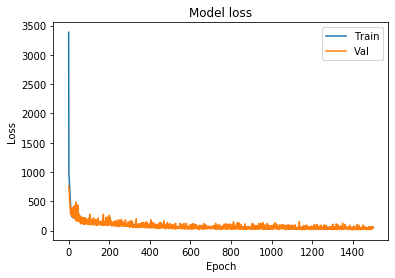

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [18]:
# serialize model to JSON
model_json = model.to_json()
with open("Interpolation/QLYS/modeldenQLYS.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Interpolation/QLYS/modeldenQLYS.h5")
print("Saved model to disk")

Saved model to disk


In [19]:
import numpy as np
from numpy import array
arr = []
for x in range(len(X_scale)):
    Xnew = array([[X_scale[x][0], X_scale[x][1] , X_scale[x][2], X_scale[x][3], X_scale[x][4], X_scale[x][5]]])
    ynew = model.predict(Xnew)
    #print(ynew[0][0])
    arr.append(ynew[0][0])
array = np.array(arr)

In [20]:
from sklearn.metrics import r2_score
r2_score(Y.tolist(), array.tolist())

0.990577894314551

In [21]:
myText = open(r'C:\Users\alejo\Documents\Proyecto_Integrador_2\AI_Value\Combination\Interpolation\QLYS\QLYS_R2ScoreDen.txt','w')
myString = str(r2_score(Y.tolist(), array.tolist()))
myText.write(myString)
myText.close()